# Biodiversity Loss in Phoenix (2017-2020)
Nathalie Bonnet
### About 
Phoenix, AZ has rapidly developed in the past 20 years. This rapid urban grot


### Github repo
 https://github.com/NatBonnet/eds220-phoenix-biodiversity


## About

## Highlights

## Datasets

## References

## Setup 

In [91]:
# Impory necessary libraries
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patch

import geopandas as gpd
import xarray as xr
import rioxarray as rioxr
from shapely import box
from shapely.geometry import Polygon

from pystac_client import Client
import planetary_computer

from IPython.display import Image 

import contextily

In [11]:
catalog = Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

catalog.get_collections()
collections = list(catalog.get_collections())

In [12]:
# Load in phoenix dataset
fp = os.path.join("data", "tl_2024_04_cousub", "tl_2024_04_cousub.shp")
arizona = gpd.read_file(fp)
arizona.columns = arizona.columns.str.lower()


In [13]:
# Specify time range of interest
time_range = "2017-01-01/2020-01-01"

In [14]:
# Specify bbox for Phoenix
bbox = [-112.826843, 32.974108, -111.184387, 33.863574]

In [15]:
search = catalog.search(
    collections = ["io-biodiversity"], 
    bbox = bbox, 
    datetime = time_range
)

We expect to get 4 objects out of the search because we specified the time range 2017-2020

In [16]:
# Get the items returned from the catalog search 
items = search.item_collection()
# Preview the items returned
items

In [ ]:
# Explore the first item in the list (2017)
ph_2017 = items[3]

ph_2020 = items[0]

This clearly needs to be clipped down because that is the entire left corner of the U.S. 

In [18]:
arizona.head()

,statefp,countyfp,cousubfp,cousubns,geoid,geoidfq,name,namelsad,lsad,classfp,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,04,005,91198,01934931,0400591198,0600000US0400591198,Flagstaff,Flagstaff CCD,22,Z5,G4040,S,12231962349,44576380,+35.1066122,-111.3662507,"POLYGON ((-112.13370 35.85596, -112.13368 35.8..."
1,04,005,91838,01934953,0400591838,0600000US0400591838,Kaibab Plateau,Kaibab Plateau CCD,22,Z5,G4040,S,7228864156,29327221,+36.5991097,-112.1368033,"POLYGON ((-112.66039 36.53941, -112.66033 36.5..."
2,04,005,91683,01934950,0400591683,0600000US0400591683,Hualapai,Hualapai CCD,22,Z5,G4040,S,2342313339,3772690,+35.9271665,-113.1170408,"POLYGON ((-113.35416 36.04097, -113.35416 36.0..."
3,04,023,92295,01934961,0402392295,0600000US0402392295,Nogales,Nogales CCD,22,Z5,G4040,S,1762339489,2382710,+31.4956020,-111.0171332,"POLYGON ((-111.36692 31.52136, -111.36316 31.5..."
4,04,023,92550,01934966,0402392550,0600000US0402392550,Patagonia,Patagonia CCD,22,Z5,G4040,S,1439560139,685527,+31.5664619,-110.6410279,"POLYGON ((-110.96273 31.68695, -110.96251 31.6..."


In [19]:
# Subset to only Phoenix area
phoenix = arizona[arizona.name == "Phoenix"]

In [20]:
# Check that this worked
phoenix.name.unique()

array(['Phoenix'], dtype=object)

In [21]:
bio_data_2017 = planetary_computer.sign(ph_2017.assets['data'].href)

bio_data_2020 = planetary_computer.sign(ph_2020.assets['data'].href)

In [22]:
biodiv_2017 = rioxr.open_rasterio(bio_data_2017)

biodiv_2020 = rioxr.open_rasterio(bio_data_2020)

In [23]:
clip_2017 = biodiv_2017.rio.clip_box(*phoenix.total_bounds).rio.clip(phoenix.geometry)

clip_2020 = biodiv_2020.rio.clip_box(*phoenix.total_bounds).rio.clip(phoenix.geometry)


In [24]:
clip_2017

<xarray.DataArray (band: 1, y: 583, x: 990)> Size: 2MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 8kB -112.5 -112.5 -112.5 ... -111.6 -111.6 -111.6
  * y            (y) float64 5kB 33.81 33.81 33.81 33.81 ... 33.29 33.29 33.29
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

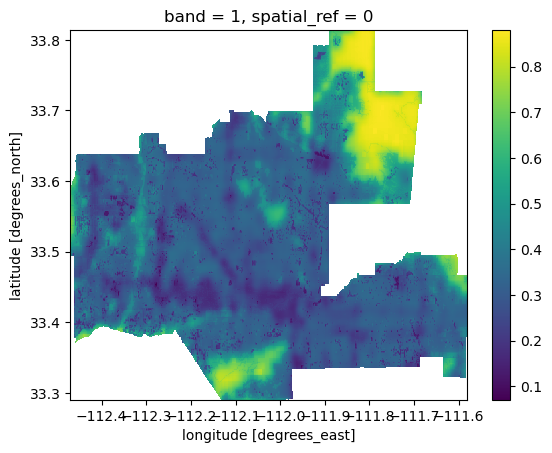

In [25]:
clip_2017.plot()

In [26]:
bii_2017 = clip_2017 >= 0.75

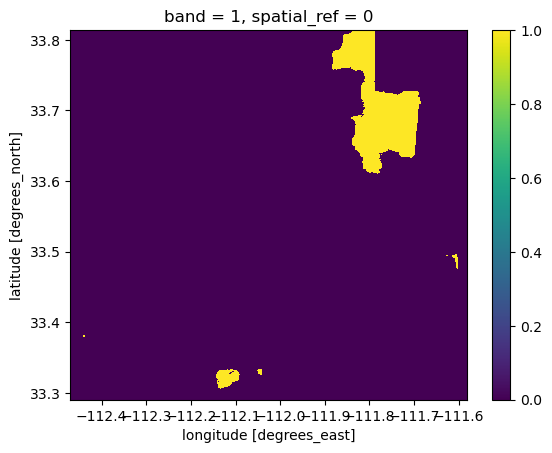

In [27]:
bii_2017.plot()

In [ ]:
# Find the percentage of area in Phoenix with a biodiversity index value of 0.75 or greater in 2017
perc_2017 = bii_2017.sum()/bii_2017.count()*100
np.array(perc_2017).tolist()

## MAKE A F STRING STATEMENT

4.181263752447286

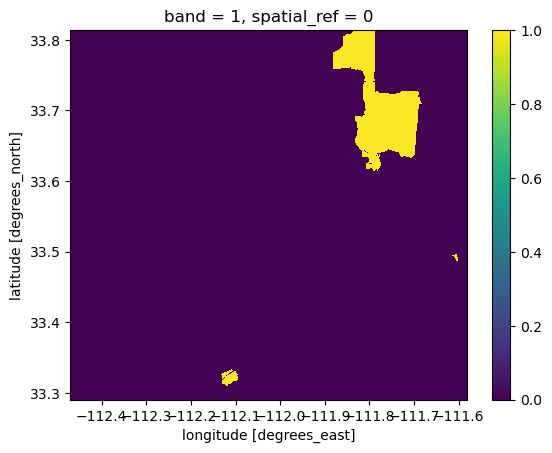

In [29]:
bii_2020 = clip_2020 >= 0.75
bii_2020.plot()

In [39]:
perc_2020 = bii_2020.sum()/bii_2020.count()*100
np.array(perc_2020).tolist()

3.8092762964118023

In [32]:
bii_change = clip_2017 - clip_2020

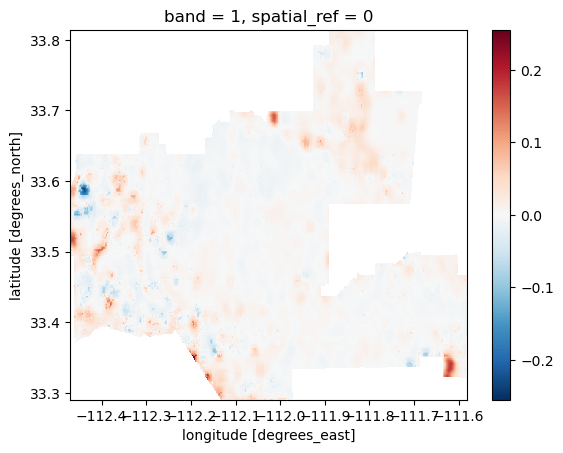

In [33]:
bii_change.plot()

In [42]:
bii_2017_int = bii_2017.astype(int)
bii_2020_int = bii_2020.astype(int)

In [51]:
bii_chng = bii_2017_int - bii_2020_int

In [52]:
bii_chng = bii_chng.where(bii_chng != 0)

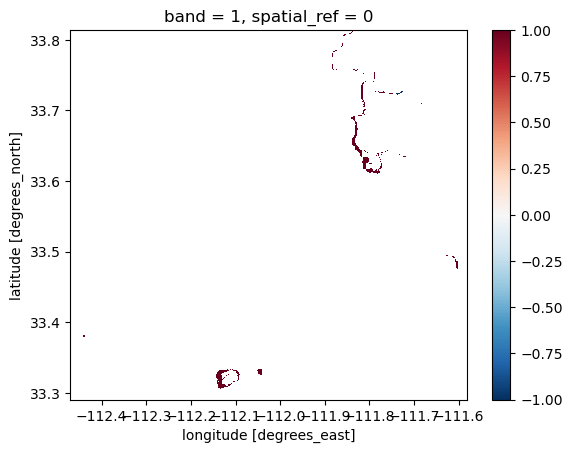

In [53]:
bii_chng.plot()

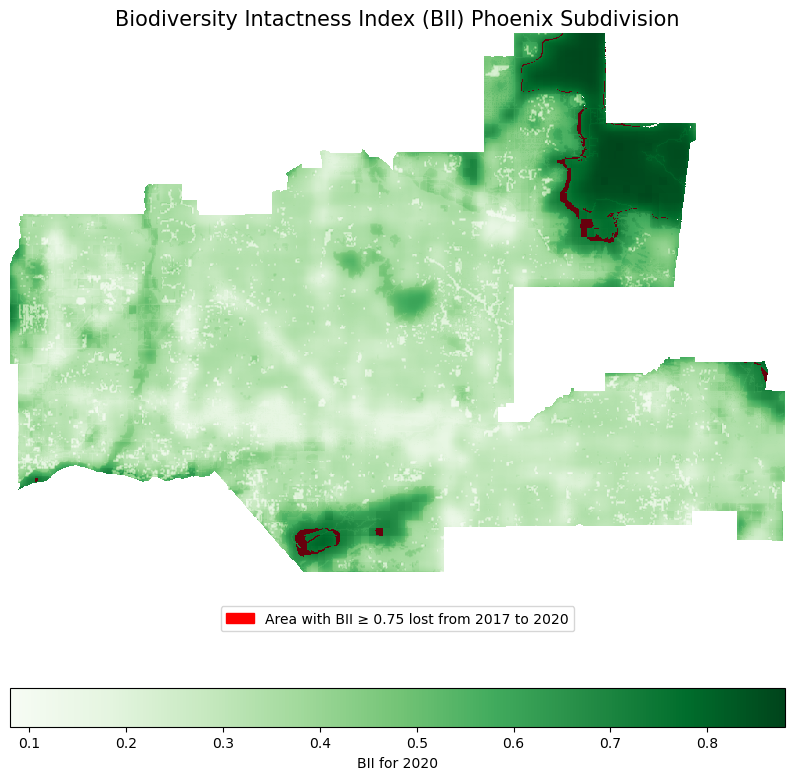

In [93]:
legend_elements = [patch.Patch(facecolor='red', edgecolor='r', label='Area with BII ≥ 0.75 lost from 2017 to 2020')]

fig, ax = plt.subplots(figsize = (10,10))
ax.axis("off")
clip_2020.plot(ax=ax, cmap ="Greens", cbar_kwargs = {'location':'bottom', 'label':'BII for 2020'})
bii_chng.plot(ax=ax, cmap = "Reds", add_colorbar = False)
ax.legend(handles=legend_elements, 
loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=5)
# Labels, title, and legend
ax.set_ylabel(" ")
ax.set_title("Biodiversity Intactness Index (BII) Phoenix Subdivision",
             {'fontsize':15})

plt.show()